In [1]:
import sys
!{sys.executable} -m pip install matplotlib pandas xlrd seaborn tqdm scikit-learn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tqdm

from sklearn.cluster import KMeans

Чтение данных из Excel

In [3]:
sales = pd.read_excel('ДанныеДекабря_2017.xlsx', 'Продажи')
sales = sales.set_index('Material')

ap = pd.read_excel('ДанныеДекабря_2017.xlsx', 'Магазины')
ap = ap.set_index('Material')

stock = pd.read_excel('ДанныеДекабря_2017.xlsx', 'Остатки')
stock = stock.set_index('Material')

price = pd.read_excel('ДанныеДекабря_2017.xlsx', 'Цены')
price = price.set_index('Material')

hierarchy = pd.read_excel('hierarchy.xlsx')

sell = pd.read_excel('Акции.xlsx')

In [4]:
sales.head()

,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,...,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00
Material,,,,,,,,,,,,,,,,,,,,,
21,22,24,52,21,11,23,20,12,8,13,...,15,21,10,10,13,9,12,8,8,6
36,0,0,0,0,0,0,0,0,0,0,...,8,18,17,9,8,7,12,2,4,1
52,0,0,0,0,0,0,0,0,0,5,...,10,17,5,18,29,19,19,13,8,14
175,0,0,0,0,0,0,0,0,0,0,...,7,8,4,3,3,5,4,3,5,5
417,18,31,69,15,8,6,14,7,9,10,...,25,34,19,29,21,33,36,22,23,15


Создание DataFrame для прогнозирования

In [5]:
corr_df = pd.DataFrame()

for x in tqdm.tqdm(sales.index[:10]):
    test_material = x

    df = pd.concat([sales.loc[test_material].rename('sales'),\
               sales.loc[test_material].shift(-1).rename('sales_1'),\
               sales.loc[test_material].shift(-2).rename('sales_2'),\
               sales.loc[test_material].shift(-3).rename('sales_3'),\
               sales.loc[test_material].shift(-4).rename('sales_4'),\
               sales.loc[test_material].shift(-5).rename('sales_5'),\
               sales.loc[test_material].shift(-6).rename('sales_6'),\
               sales.loc[test_material].shift(-9).rename('sales_9'),\
               sales.loc[test_material].shift(-12).rename('sales_12'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-1)).rename('sales_diff_1'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-2)).rename('sales_diff_2'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-3)).rename('sales_diff_3'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-4)).rename('sales_diff_4'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-5)).rename('sales_diff_5'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-6)).rename('sales_diff_6'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-9)).rename('sales_diff_9'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-12)).rename('sales_diff_12'),\
               stock.loc[test_material].rename('stock'),\
               stock.loc[test_material].shift(-1).rename('stock_1'),\
               stock.loc[test_material].shift(-2).rename('stock_2'),\
               stock.loc[test_material].shift(-3).rename('stock_3'),\
               stock.loc[test_material].shift(-4).rename('stock_4'),\
               stock.loc[test_material].subtract(stock.loc[test_material].shift(-1)).rename('stock_diff_1'),\
               stock.loc[test_material].subtract(stock.loc[test_material].shift(-2)).rename('stock_diff_2'),\
               stock.loc[test_material].subtract(stock.loc[test_material].shift(-3)).rename('stock_diff_3'),\
               stock.loc[test_material].subtract(stock.loc[test_material].shift(-4)).rename('stock_diff_4'),\
               price.loc[test_material].rename('price'),\
               price.loc[test_material].shift(-1).rename('price_1'),\
               price.loc[test_material].shift(-2).rename('price_2'),\
               price.loc[test_material].shift(-3).rename('price_3'),\
               price.loc[test_material].shift(-4).rename('price_4'),\
               price.loc[test_material].subtract(price.loc[test_material].shift(-1)).rename('price_diff_1'),\
               price.loc[test_material].subtract(price.loc[test_material].shift(-2)).rename('price_diff_2'),\
               price.loc[test_material].subtract(price.loc[test_material].shift(-3)).rename('price_diff_3'),\
               price.loc[test_material].subtract(price.loc[test_material].shift(-4)).rename('price_diff_4'),\
               ap.loc[test_material].rename('ap'),\
               ap.loc[test_material].shift(-1).rename('ap_1'),\
               ap.loc[test_material].shift(-2).rename('ap_2'),\
               ap.loc[test_material].shift(-3).rename('ap_3'),\
               ap.loc[test_material].shift(-4).rename('ap_4'),\
               ap.loc[test_material].subtract(ap.loc[test_material].shift(-1)).rename('ap_diff_1'),\
               ap.loc[test_material].subtract(ap.loc[test_material].shift(-2)).rename('ap_diff_2'),\
               ap.loc[test_material].subtract(ap.loc[test_material].shift(-3)).rename('ap_diff_3'),\
               ap.loc[test_material].subtract(ap.loc[test_material].shift(-4)).rename('ap_diff_4')],\
              axis=1)

    df.loc[:,'month'] = df.index.month

    df = df.dropna()

    corr_df = corr_df.append(df.corr().abs().sales.rename(test_material))

100%|██████████| 10/10 [00:01<00:00,  8.45it/s]


Создание DataFrame для анализа зависимостей между переменными по артикулам

In [6]:
corr_df = pd.DataFrame()

for x in tqdm.tqdm(sales.index[:]):
    test_material = x

    df = pd.concat([sales.loc[test_material].rename('sales'),\
               sales.loc[test_material].shift(-1).rename('sales_1'),\
               sales.loc[test_material].shift(-2).rename('sales_2'),\
               sales.loc[test_material].shift(-12).rename('sales_12'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-1)).rename('sales_diff_1'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-2)).rename('sales_diff_2'),\
               sales.loc[test_material].subtract(sales.loc[test_material].shift(-12)).rename('sales_diff_12'),\
               stock.loc[test_material].shift(-1).rename('stock_1'),\
               stock.loc[test_material].shift(-2).rename('stock_2'),\
               stock.loc[test_material].subtract(stock.loc[test_material].shift(-1)).rename('stock_diff_1'),\
               stock.loc[test_material].subtract(stock.loc[test_material].shift(-2)).rename('stock_diff_2'),\
               price.loc[test_material].shift(-1).rename('price_1'),\
               price.loc[test_material].shift(-1).rename('price_2'),\
               price.loc[test_material].subtract(price.loc[test_material].shift(-1)).rename('price_diff_1'),\
               price.loc[test_material].subtract(price.loc[test_material].shift(-1)).rename('price_diff_2'),\
               ap.loc[test_material].shift(-1).rename('ap_1'),\
               ap.loc[test_material].shift(-1).rename('ap_2'),\
               ap.loc[test_material].subtract(ap.loc[test_material].shift(-1)).rename('ap_diff_1'),\
               ap.loc[test_material].subtract(ap.loc[test_material].shift(-1)).rename('ap_diff_2')],\
              axis=1)

    df.loc[:,'month'] = df.index.month

    df = df.dropna()

    corr_df = corr_df.append(df.corr().abs().sales.rename(test_material))

100%|██████████| 7032/7032 [07:54<00:00, 14.25it/s]


Убираем строки у которых недостаточная статистика по продажам, их оценивать отдельно

In [7]:
corr_df = corr_df.fillna(0)

Выделение групп артикулов для ращного прогнозирования на основе коррелляции

In [19]:
#Cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(corr_df)
labels = kmeans.labels_

#Glue back to originaal data
corr_df['clusters'] = labels

# Создание нормализованной DF
corr_overal_df = corr_df.groupby('clusters').mean()

corr_overal_norm_df = (corr_overal_df-corr_overal_df.min())/(corr_overal_df.max()-corr_overal_df.min())

Отображение кластеров и кластеров

In [20]:
corr_overal_norm_df.style.background_gradient(cmap='viridis')

,ap_1,ap_2,ap_diff_1,ap_diff_2,month,price_1,price_2,price_diff_1,price_diff_2,sales,sales_1,sales_12,sales_2,sales_diff_1,sales_diff_12,sales_diff_2,stock_1,stock_2,stock_diff_1,stock_diff_2
clusters,,,,,,,,,,,,,,,,,,,,
0,0.952442,0.952442,0.393004,0.393004,0.784069,0.925194,0.925194,0.579157,0.579157,1,0.79033,0.941489,1,0.361886,0.684101,0.494067,0.919744,1,0.295397,0.456111
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.733281,0.733281,0.653723,0.653723,0.861171,0.585934,0.585934,0.795207,0.795207,1,0.573706,0.74355,0.622014,0.579128,0.914004,0.781123,0.704098,0.748893,0.40538,0.607413
3,1,1,0.871174,0.871174,1,1,1,0.51596,0.51596,1,1,1,0.886493,1,0.514044,0.543363,1,0.949667,1,1
4,0.387007,0.387007,1,1,0.880907,0.302076,0.302076,1,1,1,0.360487,0.812665,0.274251,0.751534,1,1,0.37784,0.359733,0.591497,0.792321


Вычисление колонок у кластера для использования для прогнозирования

In [21]:
# Будем отсекать по средней корелляции, за исключением артикулов, у которых нет данных
threshold = corr_overal_df[corr_overal_df.sales > 0.1].mean()
# Инициализация копии DF
corr_thresh_df = corr_overal_df.copy()
# Прогон сравнения по всем колонкам
for col in corr_overal_df.columns:
    corr_thresh_df[col] = (corr_overal_df[col] >= threshold[col]).astype(int)
    
corr_thresh_df.style.background_gradient(cmap='viridis')

,ap_1,ap_2,ap_diff_1,ap_diff_2,month,price_1,price_2,price_diff_1,price_diff_2,sales,sales_1,sales_12,sales_2,sales_diff_1,sales_diff_12,sales_diff_2,stock_1,stock_2,stock_diff_1,stock_diff_2
clusters,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0
3,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1
4,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1


In [42]:
def get_columns_by_corr(material_id):
    cluster = corr_df.loc[material_id, 'clusters']

    columns = corr_thresh_df.loc[cluster]
    
    return list(columns[columns != 0].index)

In [44]:
test_material = 21

df = pd.concat([sales.loc[test_material].rename('sales'),\
           sales.loc[test_material].shift(-1).rename('sales_1'),\
           sales.loc[test_material].shift(-2).rename('sales_2'),\
           sales.loc[test_material].shift(-12).rename('sales_12'),\
           sales.loc[test_material].subtract(sales.loc[test_material].shift(-1)).rename('sales_diff_1'),\
           sales.loc[test_material].subtract(sales.loc[test_material].shift(-2)).rename('sales_diff_2'),\
           sales.loc[test_material].subtract(sales.loc[test_material].shift(-12)).rename('sales_diff_12'),\
           stock.loc[test_material].shift(-1).rename('stock_1'),\
           stock.loc[test_material].shift(-2).rename('stock_2'),\
           stock.loc[test_material].subtract(stock.loc[test_material].shift(-1)).rename('stock_diff_1'),\
           stock.loc[test_material].subtract(stock.loc[test_material].shift(-2)).rename('stock_diff_2'),\
           price.loc[test_material].shift(-1).rename('price_1'),\
           price.loc[test_material].shift(-1).rename('price_2'),\
           price.loc[test_material].subtract(price.loc[test_material].shift(-1)).rename('price_diff_1'),\
           price.loc[test_material].subtract(price.loc[test_material].shift(-1)).rename('price_diff_2'),\
           ap.loc[test_material].shift(-1).rename('ap_1'),\
           ap.loc[test_material].shift(-1).rename('ap_2'),\
           ap.loc[test_material].subtract(ap.loc[test_material].shift(-1)).rename('ap_diff_1'),\
           ap.loc[test_material].subtract(ap.loc[test_material].shift(-1)).rename('ap_diff_2')],\
          axis=1)

df.loc[:,'month'] = df.index.month

df = df[get_columns_by_corr(test_material)]

df = df.dropna()

df.head()

,ap_diff_1,ap_diff_2,price_diff_1,price_diff_2,sales,sales_diff_1,sales_diff_12,sales_diff_2,stock_diff_1,stock_diff_2
2014-01-01,11.0,11.0,73824.246591,73824.246591,22,-2.0,-1.0,-30.0,5.6636,-1.4516
2014-02-01,-28.0,-28.0,-16057.963334,-16057.963334,24,-28.0,6.0,3.0,-7.1152,-39.6572
2014-03-01,7.0,7.0,13366.553135,13366.553135,52,31.0,27.0,41.0,-32.5420,-25.3226
2014-04-01,1.0,1.0,-22337.598180,-22337.598180,21,10.0,5.0,-2.0,7.2194,34.9667
2014-05-01,9.0,9.0,41790.842917,41790.842917,11,-12.0,5.0,-9.0,27.7473,51.6452


Создаем тренировочные данные

In [108]:
from sklearn.model_selection import train_test_split

X = df[[col for col in df.columns if col != 'sales']]

Y = df.sales

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [105]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

def create_polynomial_regression_model(degree, X_train, X_test, Y_train, Y_test):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  mean_abs_train = mean_absolute_error(Y_train, y_train_predicted)
  explained_var_train = explained_variance_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  mean_abs_test = mean_absolute_error(Y_test, y_test_predict)
  explained_var_test = explained_variance_score(Y_test, y_test_predict)
    
    
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  print("mean_abs_train score of training set is {}".format(mean_abs_train))
  print("explained_var_train score of training set is {}".format(explained_var_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
  print("mean_abs_test score of training set is {}".format(mean_abs_test))
  print("explained_var_test score of training set is {}".format(explained_var_test))

  Y_test.plot(color='b')
  pd.DataFrame(y_test_predict).plot(color='g')

The model performance for the training set
-------------------------------------------
RMSE of training set is 6.3883889313980635
R2 score of training set is 0.83667061612646
mean_abs_train score of training set is 4.955226668950594
explained_var_train score of training set is 0.83667061612646


The model performance for the test set
-------------------------------------------
RMSE of test set is 11.071579250677157
R2 score of test set is -1.5131437188691308
mean_abs_test score of training set is 9.049536541033477
explained_var_test score of training set is -1.1906169379105451


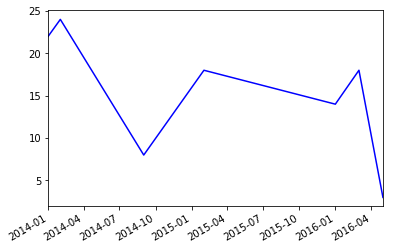

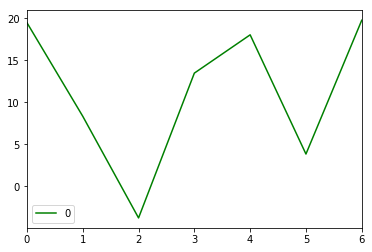

In [109]:
create_polynomial_regression_model(1, X_train, X_test, Y_train, Y_test)

The model performance for the training set
-------------------------------------------
RMSE of training set is 2.1476091040796055e-11
R2 score of training set is 1.0
mean_abs_train score of training set is 1.6100771509692483e-11
explained_var_train score of training set is 1.0


The model performance for the test set
-------------------------------------------
RMSE of test set is 15.64266881042782
R2 score of test set is -4.016720204235913
mean_abs_test score of training set is 13.309501563420895
explained_var_test score of training set is -3.517633146402865


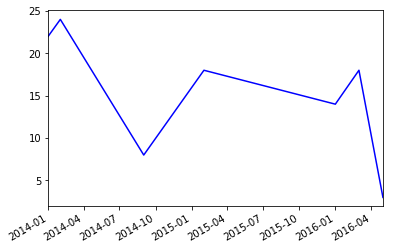

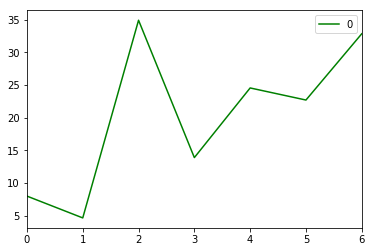

In [110]:
create_polynomial_regression_model(2, X_train, X_test, Y_train, Y_test)